# Advanced Financial Modeling with Lévy Processes and Option Pricing

## Asset Price Modeling

Asset price modeling is a crucial aspect of financial analysis, involving the prediction and explanation of the behavior of asset prices. Traditional models like the Black-Scholes often fall short in accurately representing real-world market behaviors. Here, we explore the use of Lévy processes for a more realistic simulation of asset price movements.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Simulating Asset Prices with Lévy Processes

Lévy processes are more adept at capturing the complexities of financial markets, particularly the extreme events and sudden jumps in asset prices. Let's simulate an asset's price path using a Lévy process.

In [3]:
# Function to simulate Lévy process and parameters
def simulate_levy_process(mu, sigma, lambda_, mu_j, sigma_j, S0, T, dt):
    N = int(T / dt)
    S = np.zeros(N)
    jump_sizes = np.zeros(N)  # To track jump sizes
    jump_times = []  # To track times of jumps
    S[0] = S0
    np.random.seed(42)

    for t in range(1, N):
        Z = np.random.standard_normal() 
        J = np.random.poisson(lambda_ * dt)
        if J > 0:
            Y = np.random.normal(mu_j, sigma_j) * J
            jump_sizes[t] = Y  # Record the jump size
            jump_times.append(t)  # Record the jump time
        else:
            Y = 0
        S[t] = S[t-1] * (1 + mu*dt + sigma*np.sqrt(dt)*Z + Y)
    
    return S, jump_sizes, jump_times
    
# Parameters and simulation
lambda_ = 10  # Average of one jump every two years
mu_j = -0.05  # Average jump down by 5%
sigma_j = 0.15  # Jump size can vary by 15%
mu = 0.1  # Expected return of 10% per annum
sigma = 0.2  # Annual volatility of 20%
S0 = 100  # Initial stock price
T = 1  # Simulation for one year
dt = 1/252  # Daily time steps

S, jump_sizes, jump_times = simulate_levy_process(mu, sigma, lambda_, mu_j, sigma_j, S0, T, dt)
log_returns = np.diff(np.log(S))

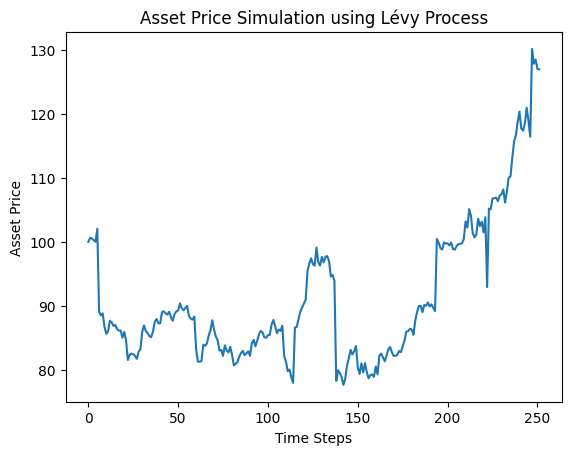

In [4]:
# Plotting the simulated asset prices
plt.plot(S)
plt.title("Asset Price Simulation using Lévy Process")
plt.xlabel("Time Steps")
plt.ylabel("Asset Price")
plt.show()

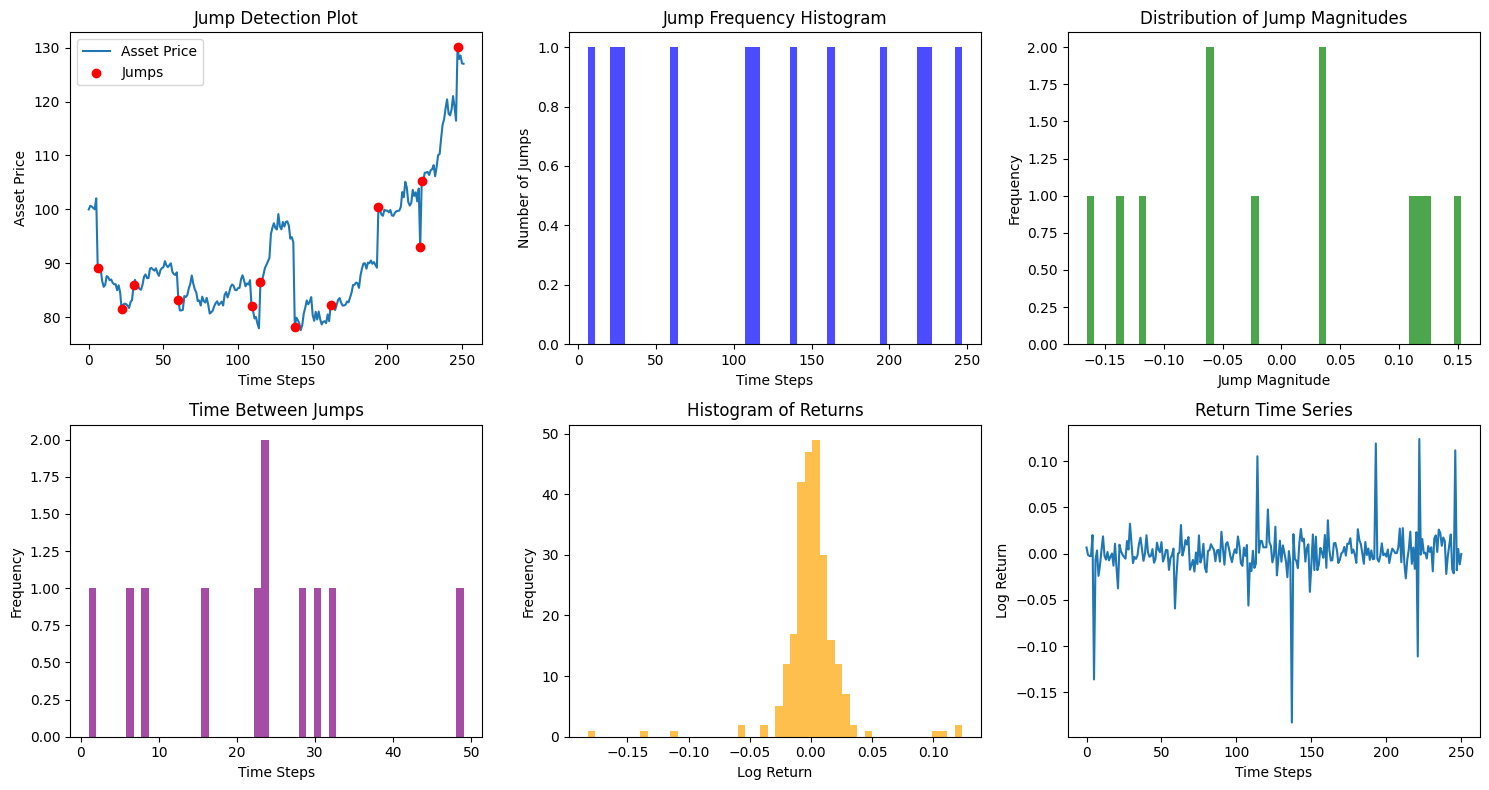

In [5]:
# Jump Detection Plot
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.plot(S, label='Asset Price')
if jump_times:
    plt.scatter(jump_times, S[jump_times], color='red', label='Jumps', zorder=5)
plt.title("Jump Detection Plot")
plt.xlabel("Time Steps")
plt.ylabel("Asset Price")
plt.legend()

# Jump Frequency Histogram
plt.subplot(2, 3, 2)
if jump_times:
    plt.hist(jump_times, bins=50, alpha=0.7, color='blue')  # Fixed number of bins
    plt.title('Jump Frequency Histogram')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Jumps')
else:
    plt.text(0.5, 0.5, 'No jumps detected', horizontalalignment='center')

# Distribution of Jump Magnitudes
plt.subplot(2, 3, 3)
plt.hist(jump_sizes[jump_sizes != 0], bins=50, alpha=0.7, color='green')
plt.title('Distribution of Jump Magnitudes')
plt.xlabel('Jump Magnitude')
plt.ylabel('Frequency')

# Time Between Jumps
time_between_jumps = np.diff(jump_times)
plt.subplot(2, 3, 4)
plt.hist(time_between_jumps, bins=50, alpha=0.7, color='purple')
plt.title('Time Between Jumps')
plt.xlabel('Time Steps')
plt.ylabel('Frequency')

# Histogram of Returns
plt.subplot(2, 3, 5)
plt.hist(log_returns, bins=50, alpha=0.7, color='orange')
plt.title('Histogram of Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')

# Return Time Series
plt.subplot(2, 3, 6)
plt.plot(log_returns)
plt.title('Return Time Series')
plt.xlabel('Time Steps')
plt.ylabel('Log Return')

plt.tight_layout()
plt.show()

## Risk Management

Effective risk management in finance is about assessing and mitigating potential risks. Traditional risk models often underestimate the complexities of financial markets. We'll use Lévy processes for a more nuanced approach to risk assessment.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
# Risk management with Lévy processes
def calculate_var(returns, alpha=0.05):
    """
    Calculate Value at Risk (VaR) for the given returns.
    """
    if len(returns) == 0:
        return None

    sorted_returns = np.sort(returns)
    index = int(alpha * len(sorted_returns))
    var = sorted_returns[index]

    return var

def calculate_es(returns, alpha=0.05):
    """
    Calculate Expected Shortfall (ES) for the given returns.
    """
    if len(returns) == 0:
        return None

    sorted_returns = np.sort(returns)
    index = int(alpha * len(sorted_returns))
    es = sorted_returns[:index].mean()

    return es

def levy_based_risk_assessment(asset_prices, risk_free_rate, time_horizon):
    """
    Assess risk using Lévy process-based simulations of asset prices.
    """
    # Calculate log returns
    log_returns = np.log(asset_prices[1:] / asset_prices[:-1])
    
    # Calculate VaR and ES
    var = calculate_var(log_returns)
    es = calculate_es(log_returns)

    return {"VaR": var, "ES": es}

In [8]:
# Parameters 
lambda_ = 10  # Average of one jump every two years
mu_j = -0.05  # Average jump down by 5%
sigma_j = 0.15  # Jump size can vary by 15%
mu = 0.1  # Expected return of 10% per annum
sigma = 0.2  # Annual volatility of 20%
S0 = 100  # Initial stock price
T = 1  # Simulation for one year
dt = 1/252  # Daily time steps

# Simulate asset prices using Lévy process
asset_prices, jump_sizes, jump_times = simulate_levy_process(mu, sigma, lambda_, mu_j, sigma_j, S0, T, dt)

# Calculate risk metrics
risk_free_rate = 0.05
time_horizon = 1
risk_metrics = levy_based_risk_assessment(asset_prices, risk_free_rate, time_horizon)

# Print risk metrics
print("Risk Metrics:")
print(f"Value at Risk (VaR): {risk_metrics['VaR']}")
print(f"Expected Shortfall (ES): {risk_metrics['ES']}")

Risk Metrics:
Value at Risk (VaR): -0.022001476556521647
Expected Shortfall (ES): -0.062268280787623524


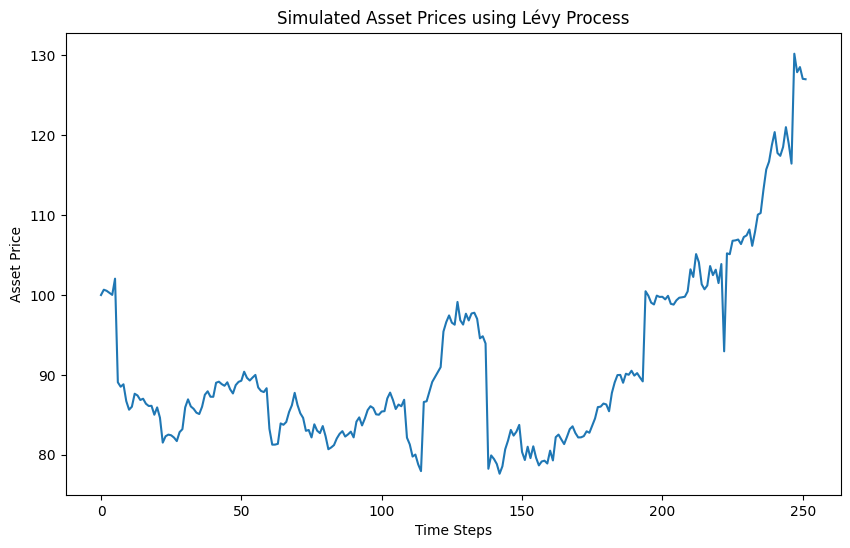

In [19]:
# Plot the simulated asset prices
plt.figure(figsize=(10, 6))
plt.plot(asset_prices)
plt.title('Simulated Asset Prices using Lévy Process')
plt.xlabel('Time Steps')
plt.ylabel('Asset Price')
plt.show()

C:\Users\donat\AppData\Local\Temp\ipykernel_6820\2716277054.py:24: RuntimeWarning: Mean of empty slice.
  es = sorted_returns[:index].mean()
c:\Users\donat\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


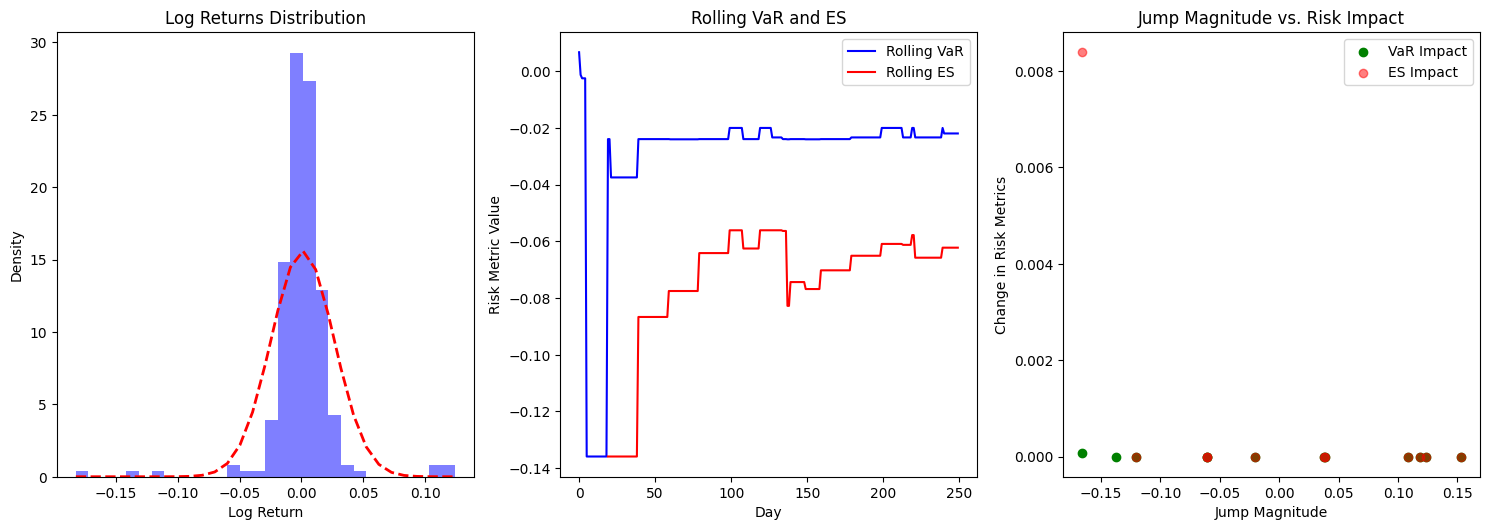

In [10]:
# Visualizations
plt.figure(figsize=(15, 10))

# 1. Overlay of Log Returns Distribution with Theoretical Distribution
log_returns = np.diff(np.log(asset_prices))
plt.subplot(2, 3, 1)
count, bins, ignored = plt.hist(log_returns, bins=30, density=True, alpha=0.5, color='blue')
mu_fit, sigma_fit = norm.fit(log_returns)
best_fit_line = norm.pdf(bins, mu_fit, sigma_fit)
plt.plot(bins, best_fit_line, 'r--', linewidth=2)
plt.title('Log Returns Distribution')
plt.xlabel('Log Return')
plt.ylabel('Density')

# 2. VaR and ES Over Time
# Assuming we calculate VaR and ES at each time step for illustration
rolling_var = [calculate_var(log_returns[max(0, i-252):i]) for i in range(1, len(log_returns))]
rolling_es = [calculate_es(log_returns[max(0, i-252):i]) for i in range(1, len(log_returns))]
plt.subplot(2, 3, 2)
plt.plot(rolling_var, 'b', label='Rolling VaR')
plt.plot(rolling_es, 'r', label='Rolling ES')
plt.title('Rolling VaR and ES')
plt.xlabel('Day')
plt.ylabel('Risk Metric Value')
plt.legend()

# 3. Jump Magnitude vs. Jump Impact on VaR/ES
# For illustration purposes, let's assume the impact is the change in VaR/ES after each jump
jump_impacts_var = np.diff(rolling_var)[jump_times]
jump_impacts_es = np.diff(rolling_es)[jump_times]
plt.subplot(2, 3, 3)
plt.scatter(jump_sizes[jump_sizes != 0], jump_impacts_var, color='green', label='VaR Impact')
plt.scatter(jump_sizes[jump_sizes != 0], jump_impacts_es, color='red', label='ES Impact', alpha=0.5)
plt.title('Jump Magnitude vs. Risk Impact')
plt.xlabel('Jump Magnitude')
plt.ylabel('Change in Risk Metrics')
plt.legend()

# Finalize plot layout and show
plt.tight_layout()
plt.show()

## Option Pricing

Option pricing is a key part of financial engineering. Traditional methods like the Black-Scholes model have limitations, particularly in volatile markets or for options with complex features. We'll explore advanced models like the Merton Jump-Diffusion and Variance Gamma models for more accurate option pricing.

### Merton Jump-Diffusion Model

The Merton Jump-Diffusion model extends the Black-Scholes model by incorporating random jumps in asset prices. This is particularly useful for pricing short-term options and capturing market shocks.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson

In [12]:
# Merton Jump-Diffusion Model Implementation
def merton_jump_call(S, K, T, r, sigma, lambda_, mu_j, sigma_j):
    """
    Implement the Merton Jump-Diffusion Model for European call options.
    """
    # Merton's formula requires integrating over all possible jump sizes,
    # which is complex and typically requires numerical methods.
    # For simplicity, we use a series expansion approach.

    M = 100  # Number of terms in the series expansion
    call_price = 0

    for m in range(M):
        # Adjust the parameters for each term in the series
        adjusted_sigma = np.sqrt(sigma**2 + (m * sigma_j**2) / T)
        adjusted_mu = r - 0.5 * sigma**2 + lambda_ * (np.exp(mu_j + 0.5 * sigma_j**2) - 1) + (m * mu_j) / T
        d1 = (np.log(S / K) + (adjusted_mu + 0.5 * adjusted_sigma**2) * T) / (adjusted_sigma * np.sqrt(T))
        d2 = d1 - adjusted_sigma * np.sqrt(T)

        # Black-Scholes formula for each term
        bs_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

        # Poisson probability for m jumps
        poisson_prob = np.exp(-lambda_ * T) * (lambda_ * T)**m / np.math.factorial(m)

        call_price += bs_price * poisson_prob

    return call_price

In [13]:
# Define parameters
S = 100  # Current stock price
K = 100  # Strike price
T = 1    # Time to expiration in years
r = 0.05 # Risk-free rate
sigma = 0.2  # Volatility of the stock
lambda_ = 0.1  # Average number of jumps per year
mu_j = -0.1   # Expected jump size
sigma_j = 0.1 # Standard deviation of jump size

# Sensitivity to Jump Intensity (lambda_)
lambdas = np.linspace(0.01, 0.3, 30)
prices_lambda = [merton_jump_call(S, K, T, r, sigma, l, mu_j, sigma_j) for l in lambdas]

# Sensitivity to Jump Magnitude (mu_j)
mu_js = np.linspace(-0.2, 0.1, 30)
prices_mu_j = [merton_jump_call(S, K, T, r, sigma, lambda_, mj, sigma_j) for mj in mu_js]

# Poisson Probabilities
poisson_probs = poisson.pmf(np.arange(10), lambda_ * T)

# Calculate the call price
call_price = merton_jump_call(S, K, T, r, sigma, lambda_, mu_j, sigma_j)
print(f"The European call option price using Merton's Jump-Diffusion Model is: {call_price:.2f}")

The European call option price using Merton's Jump-Diffusion Model is: 10.32


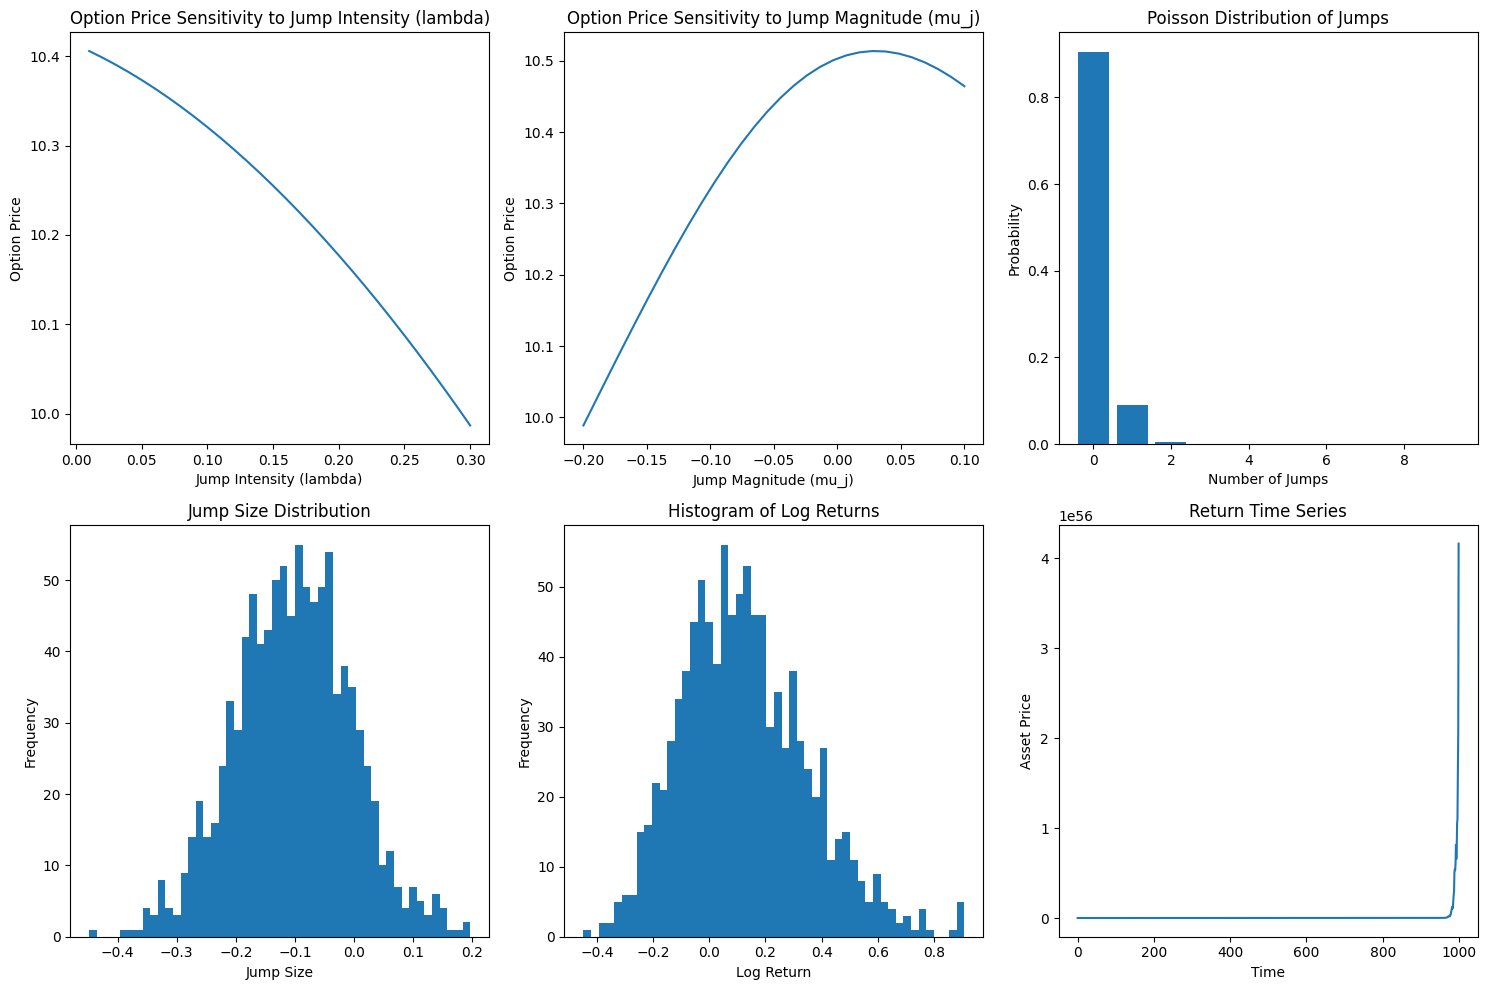

In [14]:
# Visualization
plt.figure(figsize=(15, 10))

# Sensitivity to Jump Intensity
plt.subplot(2, 3, 1)
plt.plot(lambdas, prices_lambda)
plt.title('Option Price Sensitivity to Jump Intensity (lambda)')
plt.xlabel('Jump Intensity (lambda)')
plt.ylabel('Option Price')

# Sensitivity to Jump Magnitude
plt.subplot(2, 3, 2)
plt.plot(mu_js, prices_mu_j)
plt.title('Option Price Sensitivity to Jump Magnitude (mu_j)')
plt.xlabel('Jump Magnitude (mu_j)')
plt.ylabel('Option Price')

# Poisson Distribution of Jumps
plt.subplot(2, 3, 3)
plt.bar(np.arange(10), poisson_probs)
plt.title('Poisson Distribution of Jumps')
plt.xlabel('Number of Jumps')
plt.ylabel('Probability')

# Plot the remaining visualizations...
# Jump Distribution
plt.subplot(2, 3, 4)
jump_sizes = np.random.normal(mu_j, sigma_j, 1000)
plt.hist(jump_sizes, bins=50)
plt.title('Jump Size Distribution')
plt.xlabel('Jump Size')
plt.ylabel('Frequency')

# Histogram of Returns (assuming log-normal returns without jumps)
returns = np.random.lognormal(mean=mu*T, sigma=sigma*np.sqrt(T), size=1000) - 1
plt.subplot(2, 3, 5)
plt.hist(returns, bins=50)
plt.title('Histogram of Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')

# Return Time Series
plt.subplot(2, 3, 6)
time_series = S * np.cumprod(np.exp(returns))
plt.plot(time_series)
plt.title('Return Time Series')
plt.xlabel('Time')
plt.ylabel('Asset Price')

plt.tight_layout()
plt.show()

### Variance Gamma Model

The Variance Gamma model further refines option pricing by capturing both the jumps and 'fat tails' in asset return distributions. This model is suited for a wide range of financial instruments, especially in volatile markets.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma

In [16]:
# Variance Gamma Model Implementation
def variance_gamma_call_price(S, K, T, r, theta, sigma, kappa, M):
    np.random.seed(42)  # Set the seed for reproducibility
    payoffs = []  # Initialize the list to hold the simulated payoffs

    terminal_prices = []  # List to hold terminal prices for visualization
    for _ in range(M):
        tau = gamma.rvs(a=T/kappa, scale=kappa)  # Ensure this returns a scalar
        drift = (r - 0.5 * sigma**2) * T + theta * tau
        diffusion = sigma * np.sqrt(tau) * np.random.normal()
        S_T = S * np.exp(drift + diffusion)
        payoff = max(S_T - K, 0)
        payoffs.append(payoff)  # Append the scalar payoff to the list
        terminal_prices.append(S_T)  # Record the terminal price

    # Calculate and return the expected payoff to present value
    call_price = np.exp(-r * T) * np.mean(payoffs)
    return call_price, terminal_prices

In [17]:
# Define parameters
S = 100     # Current stock price
K = 100     # Strike price
T = 1       # Time to expiration in years
r = 0.05    # Risk-free rate
theta = 0.1 # Drift of the Gamma process
sigma = 0.2 # Volatility of the Gamma process
kappa = 1.0 # Variance of the Gamma process
M = 10000   # Number of simulation paths

# Calculate the call option price
vg_call_price, terminal_prices = variance_gamma_call_price(S, K, T, r, theta, sigma, kappa, M)
print(f"The European call option price using the Variance Gamma Model is: {vg_call_price:.2f}")

The European call option price using the Variance Gamma Model is: 18.56


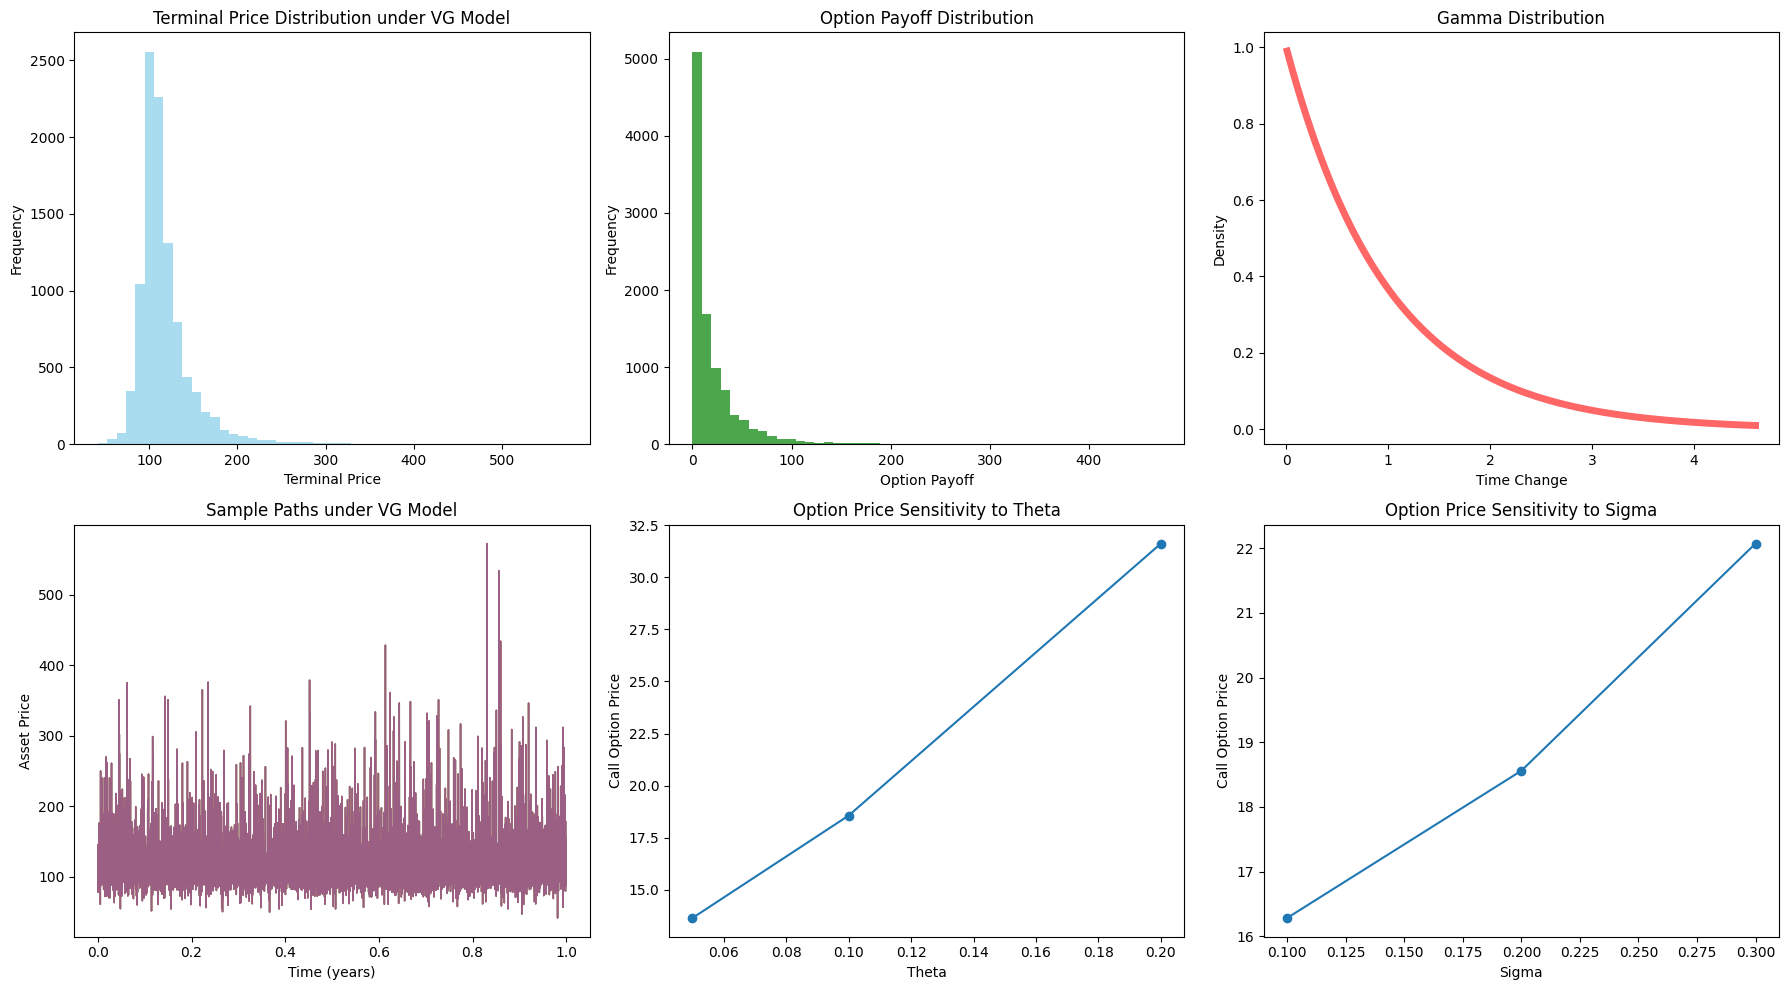

In [18]:
# Visualizations
plt.figure(figsize=(18, 10))

# Terminal Price Distribution
plt.subplot(2, 3, 1)
plt.hist(terminal_prices, bins=50, alpha=0.7, color='skyblue')
plt.title('Terminal Price Distribution under VG Model')
plt.xlabel('Terminal Price')
plt.ylabel('Frequency')

# Payoff Distribution
payoffs = [max(price - K, 0) for price in terminal_prices]
plt.subplot(2, 3, 2)
plt.hist(payoffs, bins=50, alpha=0.7, color='green')
plt.title('Option Payoff Distribution')
plt.xlabel('Option Payoff')
plt.ylabel('Frequency')

# Gamma Distribution Visualization
plt.subplot(2, 3, 3)
gamma_range = np.linspace(gamma.ppf(0.01, a=T/kappa, scale=kappa), gamma.ppf(0.99, a=T/kappa, scale=kappa), 100)
plt.plot(gamma_range, gamma.pdf(gamma_range, a=T/kappa, scale=kappa), 'r-', lw=5, alpha=0.6, label='gamma pdf')
plt.title('Gamma Distribution')
plt.xlabel('Time Change')
plt.ylabel('Density')

# Path Visualization
# Simulating a few paths for visualization
plt.subplot(2, 3, 4)
for _ in range(5):  # Just 5 paths for clarity
    plt.plot(np.linspace(0, T, M), variance_gamma_call_price(S, K, T, r, theta, sigma, kappa, M)[1], lw=1, alpha=0.6)
plt.title('Sample Paths under VG Model')
plt.xlabel('Time (years)')
plt.ylabel('Asset Price')

# Parameter Sensitivity (Theta)
theta_values = [0.05, 0.1, 0.2]
prices = [variance_gamma_call_price(S, K, T, r, theta_val, sigma, kappa, M)[0] for theta_val in theta_values]
plt.subplot(2, 3, 5)
plt.plot(theta_values, prices, 'o-')
plt.title('Option Price Sensitivity to Theta')
plt.xlabel('Theta')
plt.ylabel('Call Option Price')

# Parameter Sensitivity (Sigma)
sigma_values = [0.1, 0.2, 0.3]
prices = [variance_gamma_call_price(S, K, T, r, theta, sigma_val, kappa, M)[0] for sigma_val in sigma_values]
plt.subplot(2, 3, 6)
plt.plot(sigma_values, prices, 'o-')
plt.title('Option Price Sensitivity to Sigma')
plt.xlabel('Sigma')
plt.ylabel('Call Option Price')

plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we explored advanced financial models using Lévy processes for asset price modeling, risk management, and option pricing. These models provide deeper insights into market dynamics and enhance the precision of financial analyses and decision-making.